In [29]:
def r2_rmse_vals( Y_true, Y_pred, label ) :
    # (ypred-ytrue) squared numeratore
    diff_numeratore = []
    for idx, v in enumerate ( Y_pred ):
        diff_nu = v-Y_true[idx]
        diff_numeratore.append( diff_nu )
    diff_numeratore_SQUARED = []
    for v in diff_numeratore :
        v = v**2
        diff_numeratore_SQUARED.append( v )
    # numero elememti y_true ( per fare la media )
    num_elementi = 0
    for v in Y_true :
        num_elementi = num_elementi + 1
    # sommatoria elememti media 
    somma = 0
    for v in Y_true :
        somma = somma + v
    media = somma/num_elementi
    # sopra ho calcolato la media ( vedi denominatore )
    # sommatoria diff denominatore squared 
    diff_denominatore = []
    for idx, v in enumerate ( Y_true ):
        diff_de = v-media 
        diff_denominatore.append( diff_de )
    diff_denominatore_SQUARED = []
    for v in diff_denominatore :
        v = v**2
        diff_denominatore_SQUARED.append( v )
    sommatoria_numeratore = 0
    for v in diff_numeratore_SQUARED :
        sommatoria_numeratore = sommatoria_numeratore+v
    sommatoria_denominatore = 0
    for v in diff_denominatore_SQUARED :
        sommatoria_denominatore = sommatoria_denominatore+v
    # r2_val 
    r2 = 1-(sommatoria_numeratore/sommatoria_denominatore)
    print("r2 su",label,"set è :", r2 )
    # y_true-y_pred SQUARED 
    diff_rmse_numeratore = []
    for idx, v in enumerate ( Y_true ) :
        diff_rmse_numeratore.append( v-Y_pred[idx] )
    diff_rmse_numeratore_SQUARED = []
    for v in diff_rmse_numeratore :
        v = v**2
        diff_rmse_numeratore_SQUARED.append( v )
    sommatoria_diff_rmse = 0
    for v in diff_rmse_numeratore_SQUARED :
        sommatoria_diff_rmse = sommatoria_diff_rmse+v
    # RMSE
    rmse = (sommatoria_diff_rmse/num_elementi)**0.5
    print("rmse su",label,"set è :", rmse )   

In [30]:
# il file MOE_GRID_1078_SCALED_MOE.csv lo ho ottenuto a partire dal file base MOE_GRID_1078.xlsx( vedere inizio foglio descriptors_MOE_SCALED_GRID_NOT_SCALED_scale_false )
import pandas as pd
file = './data/MOE_GRID_1078_SCALED_MOE.csv'
file_read = pd.read_csv(file)
file_dataframe = pd.DataFrame(file_read)
file_dataframe

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,UNIQUEID,SMILE,SETID,LOGD,mol,GRID_DESCRIPTOR,0,...,SlogP_VSA3,SlogP_VSA4,SlogP_VSA8,SMR_VSA1,SMR_VSA6,TPSA,vsa_acc,vsa_other,vsa_pol,weinerPol
0,0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,1 0 0 0 0 0 0 0 ...,1.729811,...,1.274734,1.126473,0.109594,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.242571
1,1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,1 0 0 0 0 0 0 0 ...,0.224985,...,0.248713,-0.691608,-0.632522,-1.013442,0.273703,-0.366801,0.536315,-0.700811,-0.211249,-0.207889
2,2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,1 0 0 0 0 0 0 0 ...,0.751230,...,0.469541,-0.934320,-0.261464,-0.191134,0.028732,-0.338885,-0.526052,-0.942893,-0.101940,-1.165116
3,3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,1 0 0 0 0 0 0 0 ...,2.234495,...,1.274734,1.369185,-0.632522,-0.657969,1.034313,-0.037042,-0.526052,-0.263364,0.104998,0.693031
4,4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,1 0 0 0 0 0 0 0 ...,1.050557,...,0.411323,-0.934320,-0.261464,-1.065763,0.094885,-0.117799,0.255160,-0.344628,0.104998,-0.939886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,1 0 0 0 0 0 0 0 ...,-1.447175,...,-0.124774,-0.691608,-0.632522,0.080212,-0.106998,-0.819441,-1.163093,-1.333675,-0.791938,-0.996194
1074,1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,1 0 0 0 0 0 0 0 ...,-0.576575,...,1.170341,-0.934320,0.109594,0.848887,1.338626,0.714700,0.560892,0.506076,0.243471,0.467801
1075,1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1.415,O=C1Oc2c(cccc2)C=C1,1 0 0 0 0 0 0 0 ...,0.428894,...,-1.046402,-0.691608,-0.285559,-0.794416,-0.440550,-1.198053,-0.526052,-0.538473,-1.090054,-1.390346
1076,1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,1 0 0 0 0 0 0 0 ...,-0.740039,...,-1.046402,-0.691608,-0.632522,-0.025187,-1.001106,0.059668,-0.222298,0.328642,0.394279,-1.221424


In [31]:
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "GRID_DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_read["UNIQUEID"]):
    
    fdesc = file_read[file_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "GRID_DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_read[file_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_read[file_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_read[file_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)


[0.21791715 0.1120733  0.07017583 0.05948068 0.04559008 0.03779031
 0.0333575  0.0272078  0.02128133 0.02119042 0.01913998 0.01596359
 0.01447954 0.01396863 0.01283914 0.01176048 0.01137346 0.01070085
 0.01000079 0.00895763 0.00814463 0.00735478 0.0068488  0.0063962
 0.00568802 0.00563717 0.00544741 0.00485086 0.00471759 0.00448248
 0.00438164 0.00432047 0.00421384 0.00395037 0.00362344 0.00355869
 0.00331049 0.00307111 0.00295469 0.00276875 0.00273679 0.00263656
 0.00255515 0.00250756 0.00239463 0.0022319  0.00212825 0.00209776
 0.00200396 0.00197415 0.00189532 0.00185202 0.00175286 0.00174085
 0.00167308]


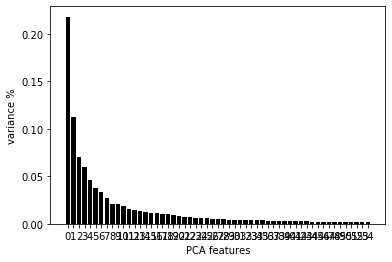

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=55)
principalComponents = pca.fit_transform(X["GM"])
print(pca.explained_variance_ratio_)

# Plot the explained variances
features = range(pca.n_components_)
explained_variance = pca.explained_variance_ratio_
plt.bar(features, explained_variance, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

plt.show()

In [33]:
PCA_components = pd.DataFrame(principalComponents)
PCA_components

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,-0.385628,-3.797450,-0.205515,0.577468,2.650235,2.107584,-0.507962,-1.988272,-0.272682,1.292063,...,0.138632,0.240683,0.125548,-0.025059,-0.295868,-0.119413,0.832928,0.142367,0.061031,-0.285331
1,-1.852267,-0.967470,1.521799,-2.190522,1.602440,-1.351195,-0.842831,-2.400753,2.772700,-0.622955,...,0.160559,0.141442,-0.297628,-0.334082,0.580680,-0.075299,-0.258519,-0.484686,0.077389,-0.287745
2,-3.337043,-3.978068,0.821395,-1.131030,-0.451054,1.285466,1.379637,-0.724121,-0.555809,1.270822,...,-0.026804,0.159323,0.078158,0.180486,0.068178,0.164579,-0.105998,0.003656,-0.084224,-0.228144
3,-0.253895,-0.667602,0.210576,1.674015,2.559883,3.029479,0.154352,-1.241352,0.541401,0.903706,...,0.129694,0.134060,0.128177,0.292931,-0.478968,-0.193009,0.610751,-0.082045,0.260227,-0.287442
4,-1.922622,-4.428363,1.265089,0.316525,-0.389950,1.273411,2.171385,-1.398246,-0.092055,0.865351,...,-0.195162,-0.047677,0.049680,0.033726,0.014587,-0.156784,0.123024,0.162921,-0.412441,-0.024531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,-2.148289,-0.223120,-0.461049,-2.137237,-1.346175,0.538462,1.127670,1.086609,0.661684,0.514355,...,0.110235,-0.201813,-0.388156,0.099241,-0.344814,0.072329,-0.445067,0.942092,0.242020,0.181517
1074,1.624281,-3.297367,1.289536,-1.760202,2.810553,1.727617,-2.237323,-1.001370,-1.300991,-0.158205,...,0.210143,-0.343238,-0.148141,-0.555117,-0.005385,-0.050778,-0.195228,0.288403,-0.512020,0.016744
1075,-4.973996,-1.083797,-0.892020,0.877158,-0.985322,0.842784,-0.448580,0.093925,0.040904,-0.102417,...,0.032358,-0.100914,0.009352,-0.020198,0.251886,-0.118595,0.009189,0.176104,0.003311,-0.124355
1076,-3.509222,-1.279654,0.934532,0.395040,-1.104419,-0.579890,-0.543524,0.658254,-1.447212,-0.528566,...,-0.280025,0.358186,0.273070,0.038646,-0.382373,-0.130296,-0.488897,0.030273,0.464544,0.451145


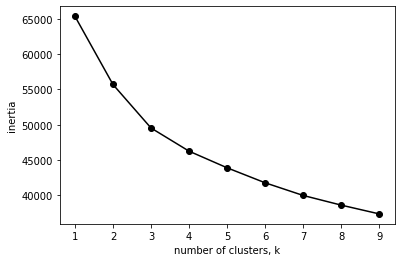

In [34]:
from sklearn.cluster import KMeans



ks = range(1, 10)

inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:53])
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [35]:
import numpy as np

# Using three clusters 
NC = 3

model = KMeans(n_clusters=NC)
   
X_01 = PCA_components.iloc[:,:53].values

y_km = model.fit(X_01)

clusters = {}
for idx , l in enumerate(y_km.labels_):
    if l in clusters:
        clusters[l].append(X_01[idx])
    else:
        clusters[l] = []
        clusters[l].append(X_01[idx])
        
        
c1 = np.asarray(clusters[0])

c2 = np.asarray(clusters[1])


c3 = np.asarray(clusters[2])

In [36]:
print(len(c1))
print(len(c2))
print(len(c3))

324
711
43


In [37]:
for idx , l in enumerate(y_km.labels_):
    print( idx, l )

0 1
1 1
2 1
3 1
4 1
5 1
6 1
7 1
8 1
9 1
10 1
11 1
12 1
13 1
14 1
15 1
16 1
17 1
18 1
19 1
20 1
21 1
22 1
23 1
24 1
25 0
26 1
27 1
28 1
29 1
30 1
31 1
32 1
33 1
34 1
35 1
36 1
37 1
38 1
39 1
40 1
41 1
42 1
43 1
44 1
45 1
46 1
47 1
48 1
49 1
50 1
51 1
52 1
53 1
54 1
55 1
56 1
57 1
58 1
59 1
60 1
61 1
62 1
63 1
64 1
65 1
66 1
67 1
68 1
69 1
70 1
71 1
72 1
73 1
74 1
75 1
76 1
77 1
78 1
79 1
80 1
81 1
82 2
83 1
84 1
85 0
86 1
87 0
88 0
89 0
90 1
91 1
92 1
93 0
94 1
95 0
96 0
97 1
98 1
99 0
100 1
101 0
102 0
103 1
104 1
105 0
106 0
107 1
108 0
109 0
110 1
111 1
112 1
113 0
114 0
115 1
116 1
117 1
118 1
119 1
120 1
121 1
122 1
123 1
124 0
125 1
126 1
127 0
128 1
129 1
130 1
131 1
132 1
133 0
134 0
135 1
136 1
137 1
138 1
139 1
140 0
141 1
142 0
143 1
144 1
145 0
146 1
147 1
148 1
149 0
150 0
151 0
152 1
153 1
154 0
155 1
156 1
157 0
158 1
159 1
160 0
161 0
162 1
163 1
164 1
165 0
166 1
167 0
168 1
169 0
170 1
171 0
172 1
173 1
174 1
175 1
176 1
177 1
178 1
179 1
180 0
181 1
182 0
183 0
184 0


In [38]:
file_NON_SCALATO = 'data/MOE_GRID_1078.xlsx'
file_NON_SCALATO_read = pd.read_excel( file_NON_SCALATO )
file_NON_SCALATO_dataframe = pd.DataFrame( file_NON_SCALATO_read )
file_NON_SCALATO_dataframe

,Unnamed: 0,Unnamed: 0.1,UNIQUEID,SMILE,SETID,DESCRIPTOR,LOGD,mol,AM1_dipole,AM1_E,...,vsurf_Wp3,vsurf_Wp4,vsurf_Wp5,vsurf_Wp6,vsurf_Wp7,vsurf_Wp8,Weight,weinerPath,weinerPol,zagreb
0,0,0,A-logD7.4-100,Fc1cc2c(N(C=C(C(O)=O)C2=O)C2CC2)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.960,Fc1c(N2CCNCC2)cc2N(C3CC3)C=C(C(=O)O)C(=O)c2c1,7.750276,-103541.820,...,75.625,12.500,4.500,0.625,0.0,0.0,331.34698,1234,43,134
1,1,1,A-logD7.4-101,S1(=O)(=O)N(CCN1C)c1cc2c([nH]cc2CCN(C)C)cc1,Tr,1 0 0 0 0 0 0 0 ...,-0.920,O=S1(=O)N(C)CCN1c1cc2c(CCN(C)C)c[nH]c2cc1,4.358144,-89582.016,...,74.125,10.500,2.500,0.000,0.0,0.0,322.43298,1055,35,120
2,2,2,A-logD7.4-104,OC=1C(=O)C=CN(CCCO)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.900,O=C1C(O)=C(C)N(CCCO)C=C1,5.544390,-57643.316,...,29.625,6.125,1.125,0.000,0.0,0.0,183.20700,254,18,60
3,3,3,A-logD7.4-105,Fc1cc2c(N(C=C(C(O)=O)C2=O)c2ccccc2C)cc1N1CCNCC1,Tr,1 0 0 0 0 0 0 0 ...,-0.830,Fc1c(N2CCNCC2)cc2N(c3c(C)cccc3)C=C(C(=O)O)C(=O...,8.887918,-116000.170,...,84.375,11.500,4.125,0.625,0.0,0.0,381.40698,1842,51,152
4,4,4,A-logD7.4-106,OC=1C(=O)C=CN(CCC(=O)NCC)C=1C,Tr,1 0 0 0 0 0 0 0 ...,-0.820,O=C(NCC)CCN1C(C)=C(O)C(=O)C=C1,6.219123,-69271.062,...,56.875,14.125,3.125,0.000,0.0,0.0,224.25999,483,22,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,1086,1086,O-88,O(CC(O)CNC(C)C)c1ccccc1CC=C,Tr,1 0 0 0 0 0 0 0 ...,1.000,O(C[C@@H](O)CNC(C)C)c1c(CC=C)cccc1,0.588812,-71140.453,...,56.500,14.250,3.625,0.750,0.0,0.0,249.35399,711,21,80
1074,1087,1087,O-9,O1CCC[C@H]1C(=O)N1CCN(CC1)c1nc(N)c2cc(OC)c(OC)...,Tr,1 0 0 0 0 0 0 0 ...,1.140,O=C(N1CCN(c2nc(N)c3c(n2)cc(OC)c(OC)c3)CC1)[C@H...,2.551292,-117421.360,...,126.125,25.375,8.875,1.375,0.0,0.0,387.44000,2195,47,150
1075,1088,1088,O-94,O1c2c(C=CC1=O)cccc2,Tr,1 0 0 0 0 0 0 0 ...,1.415,O=C1Oc2c(cccc2)C=C1,4.817789,-43230.504,...,2.875,0.000,0.000,0.000,0.0,0.0,146.14499,144,14,56
1076,1089,1089,O-97,Clc1cccc(Cl)c1C=NN=C(N)N,Te,1 0 0 0 0 0 0 0 ...,1.670,Clc1c(C=N/N=C(\N)/N)c(Cl)ccc1,2.182817,-62454.488,...,156.875,43.875,12.250,0.875,0.0,0.0,231.08600,331,17,64


In [39]:
%%time
import numpy as np 
import string


list_of_desc = ["a_acc", \
                  "bpol", \
                  "b_double", \
                  "b_rotN", \
                  "b_rotR", \
                  "chi1_C", \
                  "diameter", \
                  "logP(o/w)", \
                  "logS", \
                  "PEOE_VSA+0", \
                  "PEOE_VSA+3", \
                  "PEOE_VSA-0", \
                  "PEOE_VSA-2", \
                  "PEOE_VSA-5", \
                  "PEOE_VSA_POS", \
                  "SlogP_VSA0", \
                  "SlogP_VSA1", \
                  "SlogP_VSA2", \
                  "SlogP_VSA3", \
                  "SlogP_VSA4", \
                  "SlogP_VSA8", \
                  "SMR_VSA1", \
                  "SMR_VSA6", \
                  "TPSA", \
                  "vsa_acc", \
                  "vsa_other", \
                  "vsa_pol", \
                  "weinerPol", \
                  "DESCRIPTOR"]
                
basicname = ["G", "M", "GM", \
             "GTr", "GTe", \
             "MTe", "MTr", \
             "GMTe", "GMTr"]

X = {}
Y = {}
setid = {}
uniqueid = {}

for bn in basicname:
    X[bn] = []
    Y[bn] = []
    setid[bn] = []
    uniqueid[bn] = []

for idx, ss in enumerate(file_NON_SCALATO_read["UNIQUEID"]):
    
    fdesc = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]
    
    xval = {}
    for bn in basicname:
        xval[bn] = []

    for d in list_of_desc:
        if d == "DESCRIPTOR":
            nvs = fdesc[d].values[0].split()
            xval["GM"].extend([float(nv) for nv in nvs])  
            xval["G"].extend([float(nv) for nv in nvs])  
            xval["GMTr"].extend([float(nv) for nv in nvs])  
            xval["GTr"].extend([float(nv) for nv in nvs])  
            xval["GMTe"].extend([float(nv) for nv in nvs])  
            xval["GTe"].extend([float(nv) for nv in nvs])  
        else:
            xval["GM"].append(fdesc[d].values[0])
            xval["M"].append(fdesc[d].values[0])
            xval["GMTr"].append(fdesc[d].values[0])
            xval["MTr"].append(fdesc[d].values[0])
            xval["GMTe"].append(fdesc[d].values[0])
            xval["MTe"].append(fdesc[d].values[0])
            
    y = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['LOGD'].values[0]
    sid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['SETID'].values[0]
    uid = file_NON_SCALATO_read[file_NON_SCALATO_read["UNIQUEID"] == ss]['UNIQUEID'].values[0]
    
    for bn in ["GM", "G", "M"]:
        X[bn].append(xval[bn])
        Y[bn].append(y)
        setid[bn].append(sid)
        uniqueid[bn].append(uid)
        
    if (sid == "Tr"):
        for bn in ["GMTr", "GTr", "MTr"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)
    elif (sid == "Te"):
        for bn in ["GMTe", "GTe", "MTe"]:
            X[bn].append(xval[bn])
            Y[bn].append(y)
            setid[bn].append(sid)
            uniqueid[bn].append(uid)


for bn in basicname:
    print(bn, " : ")
    print("  ", np.asarray(Y[bn]).shape, np.asarray(X[bn]).shape )  

G  : 
   (1078,) (1078, 1879)
M  : 
   (1078,) (1078, 28)
GM  : 
   (1078,) (1078, 1907)
GTr  : 
   (865,) (865, 1879)
GTe  : 
   (213,) (213, 1879)
MTe  : 
   (213,) (213, 28)
MTr  : 
   (865,) (865, 28)
GMTe  : 
   (213,) (213, 1907)
GMTr  : 
   (865,) (865, 1907)
CPU times: user 11.8 s, sys: 90.8 ms, total: 11.9 s
Wall time: 11.9 s


In [40]:
indici_cluster_ZERO = []
indici_cluster_UNO = []
indici_cluster_DUE = []


for cont, num in enumerate (y_km.labels_) :
    if num==0 :
        indici_cluster_ZERO.append( cont )
    elif num==1 :
        indici_cluster_UNO.append( cont )
    elif num==2 :
        indici_cluster_DUE.append( cont )
        
print(len(indici_cluster_ZERO))
print(len(indici_cluster_UNO))
print(len(indici_cluster_DUE))

324
711
43


In [41]:
SETID_value = file_NON_SCALATO_dataframe['SETID']

SETID_ZERO = []
SETID_UNO = []
SETID_DUE = [] 


for ind in indici_cluster_ZERO :
    SETID_ZERO.append(SETID_value[ind])
    
SETID_UNO = []
for ind in indici_cluster_UNO :
    SETID_UNO.append(SETID_value[ind])
    
SETID_DUE = []
for ind in indici_cluster_DUE :
    SETID_DUE.append(SETID_value[ind])
    

In [42]:
Y_G_0 = []

Y_G_1 = []

Y_G_2 = []


for idx, y in enumerate (Y['G']) :
    if idx in indici_cluster_ZERO :
        Y_G_0.append( y )
    elif idx in indici_cluster_UNO :
        Y_G_1.append( y )
    elif idx in indici_cluster_DUE :
        Y_G_2.append( y )
        
print("Y_G_0 :\n", Y_G_0)
print("Y_G_1 :\n", Y_G_1)
print("Y_G_2 :\n", Y_G_2)
        

Y_G_0 :
 [-0.5, 0.25, -2.59, 0.3, 0.3, 0.37, 0.4, 0.4, 0.42, 0.49, 0.5, 0.5, 0.5, 0.5, -2.73, 0.6, 0.6, 0.7, 0.79, 0.89, 0.89, 1.0, 1.04, 1.09, 1.1, 1.1, 1.1, 1.1, 1.14, 1.17, 1.18, 1.2, 1.21, 1.22, 1.25, 1.3, 1.3, 1.31, 1.31, 1.37, 1.38, 1.45, 1.41, 1.47, 1.47, 1.47, 1.49, 1.58, 1.6, 1.61, 1.63, 1.64, 1.64, 1.68, 1.69, 1.7, 1.76, 1.79, 1.85, 1.87, 1.95, 2.03, 2.07, 2.1, 2.1, 2.1, 2.1, 2.17, 2.17, 2.18, 2.2, -1.51, 2.24, 2.27, 2.28, 2.3, 2.3, 2.3, 2.32, 2.34, 2.35, 2.4, 2.4, 2.41, 2.49, 2.5, 2.5, -1.38, 2.59, 2.6, 2.6, 2.64, 2.64, 2.7, 2.7, 2.71, 2.75, 2.76, 2.8, 2.9, 2.9, 2.9, 2.91, 2.93, 2.94, 2.96, 3.02, 3.02, 3.02, 3.11, 3.2, 3.26, 4.76, 3.4, 3.5, 3.5, 3.54, 5.77, 3.61, 5.39, 3.65, 3.7, 3.7, 3.7, 3.7, 3.71, 3.74, 3.77, 3.81, 3.81, 4.02, 4.02, 4.03, 4.09, 6.03, 4.25, 6.16, 4.42, 6.66, 4.65, 4.7, -1.1, 5.07, 5.1, 5.2, 5.61, 3.46, 3.52, 3.65, 3.94, 4.1, 6.07, 0.3, 6.1, 2.98, 2.1, 1.81, 2.3, 0.7, 2.2, 2.4, 2.4, 2.6, 2.8, 2.9, 2.9, 2.9, 2.9, 3.0, 3.0, 3.0, 3.1, 3.1, 3.1, 3.4, 3.4, 3.4, 

In [43]:
Y_G_0_TR = []
Y_G_0_TE = []

for idx, y_0 in enumerate (Y_G_0) :
    if SETID_ZERO[idx]==("Tr") :
        Y_G_0_TR.append( y_0 )
    elif SETID_ZERO[idx]==("Te") :
        Y_G_0_TE.append( y_0 )
        
print(Y_G_0_TR)
print(Y_G_0_TE)

[-0.5, 0.25, -2.59, 0.3, 0.37, 0.4, 0.42, 0.49, 0.5, 0.5, 0.5, 0.5, -2.73, 0.6, 0.6, 0.7, 0.79, 0.89, 0.89, 1.0, 1.04, 1.09, 1.1, 1.1, 1.1, 1.1, 1.17, 1.18, 1.2, 1.21, 1.25, 1.3, 1.31, 1.31, 1.37, 1.38, 1.45, 1.41, 1.47, 1.47, 1.47, 1.49, 1.58, 1.61, 1.63, 1.64, 1.68, 1.69, 1.79, 1.87, 1.95, 2.07, 2.1, 2.1, 2.1, 2.17, 2.18, 2.2, -1.51, 2.24, 2.27, 2.28, 2.3, 2.3, 2.32, 2.34, 2.35, 2.4, 2.41, 2.49, 2.5, 2.5, 2.59, 2.6, 2.6, 2.64, 2.7, 2.7, 2.71, 2.76, 2.8, 2.9, 2.9, 2.9, 2.91, 2.93, 2.94, 2.96, 3.02, 3.02, 3.02, 3.11, 3.2, 3.26, 4.76, 3.4, 3.5, 3.5, 3.54, 5.77, 3.61, 3.7, 3.7, 3.7, 3.7, 3.74, 3.77, 3.81, 4.02, 4.02, 4.03, 6.03, 6.16, 4.42, 6.66, 4.65, 4.7, -1.1, 5.07, 5.1, 5.2, 5.61, 3.46, 3.65, 3.94, 4.1, 6.07, 6.1, 2.98, 1.81, 2.3, 2.4, 2.4, 2.9, 2.9, 3.0, 3.0, 3.1, 3.1, 3.4, 3.4, 3.7, 4.2, 1.68, 2.73, 2.92, 1.37, 2.06, 1.34, 2.51, 0.88, 3.26, 2.86, 1.56, 3.44, 1.17, 1.55, 1.37, 2.67, 1.91, 1.5, 3.29, 2.32, 1.75, 2.54, 1.52, 1.13, 0.95, 3.36, 2.8, 3.61, 2.1, 2.88, 3.62, 3.13, 1.91, 2.

In [44]:
Y_G_1_TR = []
Y_G_1_TE = []

for idx, y_1 in enumerate (Y_G_1) :
    if SETID_UNO[idx]==("Tr") :
        Y_G_1_TR.append( y_1 )
    elif SETID_UNO[idx]==("Te") :
        Y_G_1_TE.append( y_1 )
        
print(Y_G_1_TR)
print(Y_G_1_TE)

[-0.96, -0.92, -0.9, -0.83, -0.82, -0.79, -0.78, -0.77, -0.77, -0.77, -0.75, -0.75, -0.73, -0.73, -0.7, -0.67, -0.66, -0.64, -0.57, -0.55, -0.52, -0.51, -0.39, -0.48, -0.47, -0.46, -0.43, -2.92, -0.43, -0.43, -0.41, -0.41, -0.4, -0.36, -0.34, -0.32, -0.32, -0.31, -0.28, -0.26, -0.24, -0.23, -0.2, -0.2, -0.2, -0.17, -0.16, -0.12, -0.08, -0.06, -2.75, -0.07, -0.03, -0.02, 0.008, 0.02, 0.02, 0.03, 0.04, 0.05, 0.05, 0.05, 0.05, 0.19, 0.11, 0.12, 0.16, 0.16, 0.18, 0.2, 0.22, 0.254, 0.31, 0.31, 0.31, 0.393999999999999, 0.4, 0.4, 0.47, 0.5, 0.5, 0.5, 0.55, 0.57, 0.6, 0.6, 0.6, 0.61, 0.65, 0.69, 0.7, 0.7, 0.72, 0.73, 0.8, 0.8, 0.85, 0.86, 0.88, 0.9, 0.9, 0.96, 1.0, 1.01, 1.06, 1.09, 1.09, -2.12, 1.1, 1.1, 1.1, 1.12, 1.14, 1.15, 1.2, 1.2, 1.2, 1.22, 1.24, 1.27, 1.3, 1.3, 1.3, 1.3, 1.3, 1.36, 1.4, 1.4, 1.4, 1.4, 1.42, 1.44, 1.45, 1.5, 1.52, -1.71, 1.54, 1.55, 1.59, 1.6, 1.6, 1.6, 1.6, 1.61, 1.63, 1.64, 1.66, 1.7, 1.7, -1.7, 1.7, 1.7, 1.73, 1.76, 1.78, 1.79, 1.8, 1.8, -1.6, 1.8, 1.8, 1.88, 1.89, 

In [45]:
Y_G_2_TR = []
Y_G_2_TE = []

for idx, y_2 in enumerate (Y_G_2) :
    if SETID_DUE[idx]==("Tr") :
        Y_G_2_TR.append( y_2 )
    elif SETID_DUE[idx]==("Te") :
        Y_G_2_TE.append( y_2 )
        
print(Y_G_2_TR)
print(Y_G_2_TE)

[0.2, 2.1, 2.42, 3.4, 3.7, 3.9, 4.22, 4.3, 4.3, 4.38, 4.6, 4.7, 4.85, 2.8, 3.6, 4.07, 3.8, 4.11, 3.5, 4.3, 4.2, 4.5, 4.4, 4.2, 4.0, 2.8, 3.3, 3.5, 3.2, 0.45, 1.92, -1.95, 0.98, 1.14, 0.33]
[-1.33, 2.8, 4.0, 4.3, 4.5, 4.8, 3.5, 4.4]


In [46]:
import numpy as np
X_G_0 = []

X_G_1 = []

X_G_2 = []


for idx, x in enumerate (X["G"]) :
    if idx in indici_cluster_ZERO :
        X_G_0.append( x )
    elif idx in indici_cluster_UNO :
        X_G_1.append( x )
    elif idx in indici_cluster_DUE :
        X_G_2.append( x )
        

print(np.shape( X_G_0))
print(np.shape(X_G_1))
print(np.shape( X_G_2))

(324, 1879)
(711, 1879)
(43, 1879)


In [47]:
X_G_0_TR = []
X_G_0_TE = []

for idx, x_0 in enumerate (X_G_0) :
    if SETID_ZERO[idx]==("Tr") :
        X_G_0_TR.append( x_0 )
    elif SETID_ZERO[idx]==("Te") :
        X_G_0_TE.append( x_0 )
        
print(np.shape(X_G_0_TR))
print(np.shape(X_G_0_TE))

(264, 1879)
(60, 1879)


In [48]:
X_G_1_TR = []
X_G_1_TE = []

for idx, x_1 in enumerate (X_G_1) :
    if SETID_UNO[idx]==("Tr") :
        X_G_1_TR.append( x_1 )
    elif SETID_UNO[idx]==("Te") :
        X_G_1_TE.append( x_1 )
        
print(np.shape(X_G_1_TR))
print(np.shape(X_G_1_TE))

(566, 1879)
(145, 1879)


In [49]:
X_G_2_TR = []
X_G_2_TE = []

for idx, x_2 in enumerate (X_G_2) :
    if SETID_DUE[idx]==("Tr") :
        X_G_2_TR.append( x_2 )
    elif SETID_DUE[idx]==("Te") :
        X_G_2_TE.append( x_2 )
        
print(np.shape(X_G_2_TR))
print(np.shape(X_G_2_TE))

(35, 1879)
(8, 1879)


In [50]:
%%time
import sklearn 
import sklearn.preprocessing 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_G_SCALED_Tr_0 = scaler.fit_transform(X_G_0_TR)
X_G_SCALED_Tr_0_dataframe = pd.DataFrame(X_G_SCALED_Tr_0)

X_G_SCALED_Te_0 = scaler.fit_transform(X_G_0_TE)
X_G_SCALED_Te_0_dataframe = pd.DataFrame(X_G_SCALED_Te_0)
print(X_G_SCALED_Tr_0_dataframe)
print(X_G_SCALED_Te_0_dataframe)

X_G_SCALED_TOT_0 = scaler.fit_transform(X_G_0)
X_G_SCALED_TOT_0_dataframe = pd.DataFrame(X_G_SCALED_TOT_0)
print(X_G_SCALED_TOT_0_dataframe)

     0     1         2     3     4     5     6     7         8         9     \
0     0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
1     0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
2     0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
3     0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
4     0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
..    ...   ...       ...   ...   ...   ...   ...   ...       ...       ...   
259   0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
260   0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
261   0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
262   0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   
263   0.0   0.0 -0.061663   0.0   0.0   0.0   0.0   0.0 -0.061663 -0.124035   

     ...  1869      1870  1871  1872      1873  187

In [51]:
scaler = StandardScaler()
X_G_SCALED_Tr_1 = scaler.fit_transform(X_G_1_TR)
X_G_SCALED_Tr_1_dataframe = pd.DataFrame(X_G_SCALED_Tr_1)

X_G_SCALED_Te_1 = scaler.fit_transform(X_G_1_TE)
X_G_SCALED_Te_1_dataframe = pd.DataFrame(X_G_SCALED_Te_1)
print(X_G_SCALED_Tr_1_dataframe)
print(X_G_SCALED_Te_1_dataframe)

X_G_SCALED_TOT_1 = scaler.fit_transform(X_G_1)
X_G_SCALED_TOT_1_dataframe = pd.DataFrame(X_G_SCALED_TOT_1)
print(X_G_SCALED_TOT_1_dataframe)

     0        1     2         3     4         5         6     7     8     \
0     0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
1     0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
2     0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
3     0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
4     0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
..    ...      ...   ...       ...   ...       ...       ...   ...   ...   
561   0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
562   0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
563   0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
564   0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   
565   0.0 -0.04207   0.0 -0.059549   0.0 -0.059549 -0.084365   0.0   0.0   

         9     ...     1869      1870  1871  1872      1873     1874     1875  \
0   -0

In [52]:
scaler = StandardScaler()
X_G_SCALED_Tr_2 = scaler.fit_transform(X_G_2_TR)
X_G_SCALED_Tr_2_dataframe = pd.DataFrame(X_G_SCALED_Tr_2)

X_G_SCALED_Te_2 = scaler.fit_transform(X_G_2_TE)
X_G_SCALED_Te_2_dataframe = pd.DataFrame(X_G_SCALED_Te_2)
print(X_G_SCALED_Tr_2_dataframe)
print(X_G_SCALED_Te_2_dataframe)

X_G_SCALED_TOT_2 = scaler.fit_transform(X_G_2)
X_G_SCALED_TOT_2_dataframe = pd.DataFrame(X_G_SCALED_TOT_2)
print(X_G_SCALED_TOT_2_dataframe)

    0     1     2     3     4     5     6     7     8     9     ...  1869  \
0    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
5    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
6    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
7    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
8    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
9    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
10   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
11   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

In [53]:
def Modelli_SVM_clusters( X_Tr, Y_Tr, X_Te, Y_Te, X_Tot, Y_Tot ) :
    import math
    import matplotlib.pyplot as plt
    from sklearn import svm
    from sklearn.svm import SVR
    from sklearn import metrics
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import cross_val_predict 
    from sklearn.model_selection import cross_val_score


    svr_model = svm.SVR(gamma='auto',kernel='sigmoid', C=50, epsilon=0.1)
    svr_model.fit(X_Tr,Y_Tr)
    Y_pred_TOT = svr_model.predict(X_Tot)
    Y_pred_Tr = svr_model.predict(X_Tr)
    Y_cv_Tr = cross_val_predict( svr_model, X_Tr, Y_Tr, cv=10)
    Y_pred_Te = svr_model.predict(X_Te)
    diff_abs_modello = []
    diff_NOabs_modello = []
    
    diff_abs_modello_Tot = []
    diff_abs_modello_Te = []
    diff_abs_modello_Tr = []
    
    diff_NOabs_modello_Tot = []
    diff_NOabs_modello_Te = []
    diff_NOabs_modello_Tr = []
    
    for idx, v in enumerate(Y_Tot):
        diff_abs_Tot = math.fabs(v-Y_pred_TOT[idx])
        diff_abs_modello_Tot.append(diff_abs_Tot)
        diff_NOabs_Tot = v-Y_pred_TOT[idx]
        diff_NOabs_modello_Tot.append(diff_NOabs_Tot)
        
    
    for idx,v in enumerate (Y_Te):
        diff_abs_Te = math.fabs(v-Y_pred_Te[idx])
        diff_abs_modello_Te.append(diff_abs_Te)
        diff_NOabs_Te = v-Y_pred_Te[idx]
        diff_NOabs_modello_Te.append(diff_NOabs_Te)
        
    for idx,v in enumerate (Y_Tr):
        diff_abs_Tr = math.fabs(v-Y_pred_Tr[idx])
        diff_abs_modello_Tr.append(diff_abs_Tr)
        diff_NOabs_Tr = v-Y_pred_Tr[idx]
        diff_NOabs_modello_Tr.append(diff_NOabs_Tr)
    
    r2_rmse_vals( Y_Tr, Y_pred_Tr, "Tr" )
    r2_rmse_vals( Y_Te, Y_pred_Te, "Te" )
    r2_rmse_vals( Y_Tot, Y_pred_TOT, "Tot" )
    
    
    print( "Errori sul set training :",np.average(diff_abs_modello_Tr), np.std(diff_abs_modello_Tr), np.std(diff_NOabs_modello_Tr))
    print( "Errori sul set test :",np.average(diff_abs_modello_Te), np.std(diff_abs_modello_Te), np.std(diff_NOabs_modello_Te) )
    print( "Errori sul set totale :",np.average(diff_abs_modello_Tot), np.std(diff_abs_modello_Tot), np.std(diff_NOabs_modello_Tot) )
    
    plt.scatter(Y_Tot, Y_pred_TOT)
    plt.xlabel("Y_true_TOT")
    plt.ylabel("Y_pred_TOT")
    plt.show()   
    
    plt.scatter(Y_Tr, Y_pred_Tr)
    plt.xlabel("Y_true_Tr")
    plt.ylabel("Y_pred_Tr")
    plt.show() 
    
    plt.scatter(Y_Te, Y_pred_Te)
    plt.xlabel("Y_true_Te")
    plt.ylabel("Y_pred_Te")
    plt.show() 

r2 su Tr set è : 0.9962258347922932
rmse su Tr set è : 0.09684338087673525
r2 su Te set è : 0.7253267942055597
rmse su Te set è : 0.7351084513653139
r2 su Tot set è : 0.954152664509679
rmse su Tot set è : 0.33096411834341816
Errori sul set training : 0.09541527301815154 0.016570036044258312 0.09683809408271295
Errori sul set test : 0.5465840501391834 0.49155906196728444 0.7347226821286234
Errori sul set totale : 0.1548728437075066 0.29249213649735323 0.33092324532508277


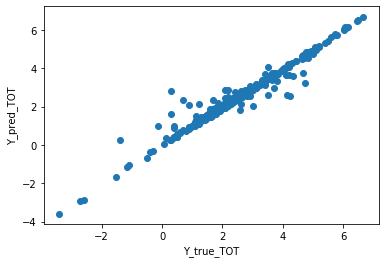

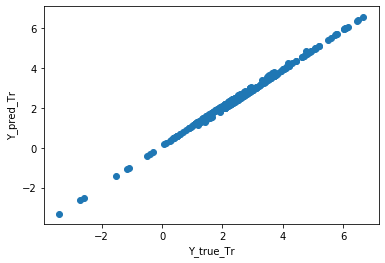

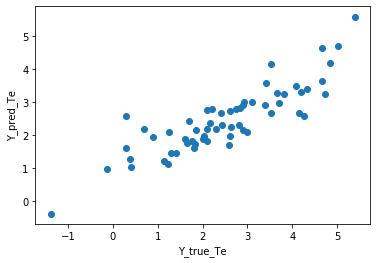

In [54]:
Modelli_SVM_clusters( X_G_SCALED_Tr_0, Y_G_0_TR, X_G_SCALED_Te_0, Y_G_0_TE, X_G_SCALED_TOT_0, Y_G_0 ) 

r2 su Tr set è : 0.9973580451768376
rmse su Tr set è : 0.09679664366331639
r2 su Te set è : 0.7073102897170367
rmse su Te set è : 0.9275461037949163
r2 su Tot set è : 0.9545327973597038
rmse su Tot set è : 0.3950365518878671
Errori sul set training : 0.09520673338384955 0.017471924417752013 0.09667698246706331
Errori sul set test : 0.7285840116701972 0.5740271009313861 0.8938975971094573
Errori sul set totale : 0.20286303559049504 0.33896971268605275 0.39130772147873333


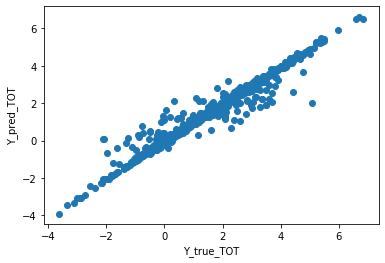

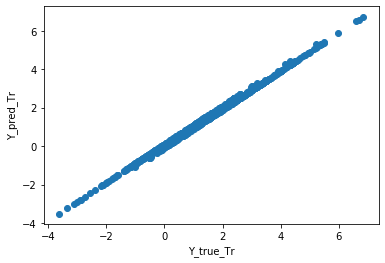

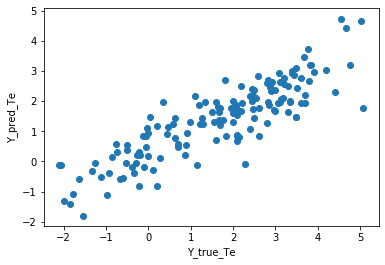

In [55]:
Modelli_SVM_clusters( X_G_SCALED_Tr_1, Y_G_1_TR, X_G_SCALED_Te_1, Y_G_1_TE, X_G_SCALED_TOT_1, Y_G_1 ) 

r2 su Tr set è : 0.9960427262980246
rmse su Tr set è : 0.09861998648815161
r2 su Te set è : 0.5429511941229529
rmse su Te set è : 1.2665027474968058
r2 su Tot set è : 0.868047928539349
rmse su Tot set è : 0.5925445893323652
Errori sul set training : 0.09841376521322041 0.006374366751320246 0.09852078685584843
Errori sul set test : 1.0200892344233172 0.750631176564502 1.2445202558156403
Errori sul set totale : 0.2673531583384994 0.5288018334626786 0.5908199230172368


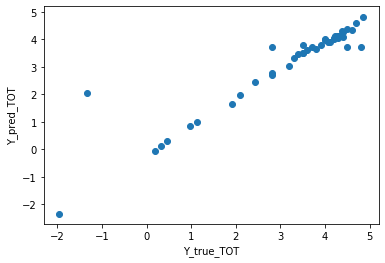

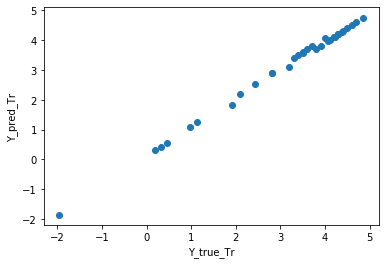

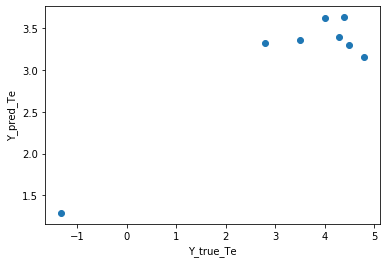

In [56]:
Modelli_SVM_clusters( X_G_SCALED_Tr_2, Y_G_2_TR, X_G_SCALED_Te_2, Y_G_2_TE, X_G_SCALED_TOT_2, Y_G_2 ) 